---------------------------------

Nguyen Thanh Long

-------------------------------

## Problem Description ##
We have `n` jobs, Each job i runs from `startTime[i]` to `endTime[i]`, and gives a profit of `profit[i]`

**Goal:** Return the maximum total profit by selecting a subset of non-overlapping jobs.

I apply three methods to solve the problem:

**1.** DFS + Memoization + Binary Search
 
**2.** Dynamic Programming(DP) +  Binary Search

**3.** Binary Integer Programming (BIP)

## Example 

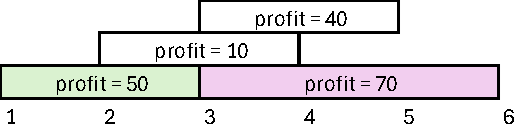

- **Input** : startTime = [1,2,3,3] ; endTime = [3,4,5,6] ; profit = [50,10,40,70]
- **Output** : 120
- **Explanation**: The subset chosen is the first and the forth job. Time range [1-3] + [3-6], we get profit of 120 = 50 + 70

### 1. DFS + Memoization + Binary Search

- **pros:** Simple, easy to implement, no external libraries needed
- **cons:** Risk of stack overflow on large data, hard to optimize/extend
- **Enterprise applicability:** Low (not suitable for integration)
- **Solving performance:** Moderate (up to ~10⁴ jobs)
- **Extendability:** Poor

In [19]:
import bisect
from typing import List

class Solution:
    def jobScheduling(self, startTime: List[int], endTime: List[int], profit: List[int]) -> int:
        intervals = sorted(zip(startTime, endTime, profit), key=lambda x: x[1])  # Sort by endTime
        start = [job[0] for job in intervals]
        cache = {}

        def dfs(i):
            if i == len(intervals):
                return 0
            if i in cache:
                return cache[i]
            # Don't include current job
            res = dfs(i + 1)
            # Include current job
            # Find the next job whose startTime >= current job's endTime
            j = bisect.bisect_left(start, intervals[i][1])  # start[j] >= end[i]
            res = max(res, intervals[i][2] + dfs(j))

            cache[i] = res
            return res
        return dfs(0)

# Input
startTime = [1,2,3,3] 
endTime = [3,4,5,6] 
profit = [50,10,40,70]

solution = Solution()
result = solution.jobScheduling(startTime, endTime, profit)

# Print result
print("Maximum profit:", result)

Maximum profit: 120


**==> Further coding is needed to retrieve the selected tasks**

### 2. Dynamic Programming(DP) + Binary Search

- **pros:**  Very fast and time-efficient, cales well to large data
- **cons:** Not suitable for complex constraint modeling
- **Enterprise applicability:** Medium (can be used as a standalone module)
- **Solving performance:**  Good (up to ~10⁵ jobs)
- **Extendability:** Limited

In [38]:
from bisect import bisect_right

def jobScheduling(startTime, endTime, profit):
    jobs = sorted(zip(startTime, endTime, profit), key=lambda x: x[1])
    starts = [job[0] for job in jobs]
    dp = [0] * (len(jobs) + 1)

    for i in range(1, len(jobs) + 1):
        s, e, p = jobs[i-1]
        # Find the latest job that doesn't overlap (binary search)
        j = bisect_right([job[1] for job in jobs], s)
        dp[i] = max(dp[i-1], dp[j] + p)
    return dp[-1]

# Input
startTime = [1,2,3,3] 
endTime = [3,4,5,6] 
profit = [50,10,40,70]


result = jobScheduling(startTime, endTime, profit)
print("Maximum profit:",result)

Maximum profit: 120


**==> Further coding is needed to retrieve the selected tasks**

### 3. Binary Integer Programming (BIP)

- **pros:**  Highly flexible, supports additional constraints, easily integrated into enterprise systems
- **cons:** Slower solving time,  requires modeling skills and solver tools 
- **Enterprise applicability:** High (integrates well with ERP, APS, MES systems)
- **Solving performance:** Slow (practical for n ≲ 1000)
- **Extendability:** Strong (easily supports extra business rules like resource limits, shift schedules, penalty costs, etc)

**Decision variable**
$$
x_i =
\begin{cases}
1 & \text{if job } i \text{ is selected} \\
0 & \text{otherwise}
\end{cases}
$$

**Objective Function (maximize total profit):**
$$
\max \sum_{i=1}^{n} profit_i \cdot x_i
$$

 **Constraint (no overlapping jobs):**

For every pair of jobs \( (i, j) \) that overlap:

$$
x_i + x_j \leq 1
$$

In [41]:
from pulp import *

def jobSchedulingPulp(startTime, endTime, profit):
    n = len(startTime)

    # Create the model
    model = LpProblem("Maximize_Job_Profit", LpMaximize)

    # Create variables
    x = [LpVariable(f"x_{i}", cat=LpBinary) for i in range(n)]

    # Objective function
    model += lpSum(profit[i] * x[i] for i in range(n))

    # Constraints
    for i in range(n):
        for j in range(i + 1, n):
            if not (endTime[i] <= startTime[j] or endTime[j] <= startTime[i]):
                model += x[i] + x[j] <= 1, f"No_Overlap_{i}_{j}"

    # Solve
    model.solve()

    selected_jobs = [i for i in range(n) if value(x[i]) > 0.5]
    total_profit = value(model.objective)

    # Print result
    print("Maximum profit:", total_profit)
    print("Selected jobs:")
    for i in selected_jobs:
        print(f"  Job #{i+1} — Start: {startTime[i]}, End: {endTime[i]}, Profit: {profit[i]}")

    return total_profit


# Input
startTime = [1,2,3,3] 
endTime = [3,4,5,6] 
profit = [50,10,40,70]

# Output
jobSchedulingPulp(startTime, endTime, profit)

Maximum profit: 120.0
Selected jobs:
  Job #1 — Start: 1, End: 3, Profit: 50
  Job #4 — Start: 3, End: 6, Profit: 70


120.0

## Summary & Recommendation

| Method | Pros | Cons | Best use case |
|--------|------|------|----------------|
| **DFS + Memoization** | Simple, intuitive | Stack overflow risk | Academic / small test cases |
| **DP + Binary Search** | Fast, scalable | Hard to extend | Large-scale fixed structure |
| **BIP with PuLP** | Flexible, enterprise-ready | Slower, needs solver | Business apps, ERP, scheduling |

**Conclusion**:  
- Use **DP** for speed and large input  
- Use **BIP** for integration, constraint handling, and real-world applications  
- Use **DFS** for learning or small-scale testing
